In [2]:
source('../src/load_data.r')
source('../src/multiplot.r')

Housing DataFrames:
`housing_df` contains target sale price
`numeric_log_sc_df` consists only of numeric features
`categoric_df` consists only of categorical features

In [3]:
t(dim(housing_df))
head(housing_df)

1451,80


MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,2,2008,WD,Normal,208500
20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,⋯,0,without,without,without,0,5,2007,WD,Normal,181500
60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,9,2008,WD,Normal,223500
70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,⋯,0,without,without,without,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,⋯,0,without,without,without,0,12,2008,WD,Normal,250000
50,RL,85,14115,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,⋯,0,without,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
t(dim(numeric_df))
t(dim(numeric_log_sc_df))
t(dim(categoric_df))

1451,23


1451,23


1451,56


### Contingency Tables

In [5]:
t(colnames(categoric_df))

MSSubClass,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,⋯,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [7]:
mssc <- t(as.data.frame(table(categoric_df$MSSubClass)))
rownames(mssc) <- c('MSSubClass', 'Freq')
mssc

MSSubClass,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190
Freq,532,69,4,12,144,296,60,16,57,20,52,86,63,10,30


In [6]:
mssc_prop <- t(as.data.frame(prop.table(table(categoric_df$MSSubClass))))
rownames(mssc_prop) <- c('MSSubClass', 'Prop')
mssc_prop

MSSubClass,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190
Prop,0.366643694,0.047553411,0.002756720,0.008270159,0.099241902,0.203997243,0.041350793,0.011026878,0.039283253,0.013783598,0.035837354,0.059269469,0.043418332,0.006891799,0.020675396


The first table above show the the frequency(or counts) of how many items in the dataset belonged in each category, using the corresponding code. 
For instance, we can see that there were 60 houses coded 70, which represents `2-STORY 1945 & older`.

The second table above shows the proportion, that is the frequency divided by the total instances, of how many items belong in each category. Using the same example 

#### Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [7]:
table(categoric_df$Utilities)
prop.table(table(categoric_df$Utilities))


AllPub NoSeWa 
  1450      1 


      AllPub       NoSeWa 
0.9993108201 0.0006891799 

Based on this contingency table, we can probably conclude that Utilities is not a useful feature since it only has 1 instance that does not have AllPub.

#### Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			

In [8]:
nb_tb <- t(as.data.frame(table(categoric_df$Neighborhood)))
rownames(nb_tb) <- c('Neighborhood', 'Freq')
nb_tb
nb_ptb <- t(as.data.frame(prop.table(table(categoric_df$Neighborhood))))
rownames(nb_ptb) <- c('Neighborhood', 'Prop')
nb_ptb

Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,⋯,NridgHt,NWAmes,OldTown,Sawyer,SawyerW,Somerst,StoneBr,SWISU,Timber,Veenker
Freq,17,2,16,58,28,149,50,100,78,37,⋯,76,73,113,74,58,83,25,25,37,11


Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,⋯,NridgHt,NWAmes,OldTown,Sawyer,SawyerW,Somerst,StoneBr,SWISU,Timber,Veenker
Prop,0.011716058,0.001378360,0.011026878,0.039972433,0.019297037,0.102687802,0.034458994,0.068917988,0.053756030,0.025499655,⋯,0.052377671,0.050310131,0.077877326,0.050999311,0.039972433,0.057201930,0.017229497,0.017229497,0.025499655,0.007580979


#### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [9]:
oq_tb <- as.data.frame(table(categoric_df$OverallQual))
colnames(oq_tb) <- c('OverallQual', 'Freq')
oq_tb
oq_ptb <- as.data.frame(prop.table(table(categoric_df$OverallQual)))
colnames(oq_ptb) <- c('OverallQual', 'Prop')
oq_ptb

OverallQual,Freq
1,2
2,3
3,20
4,116
5,396
6,372
7,315
8,167
9,43
10,17


OverallQual,Prop
1,0.00137836
2,0.00206754
3,0.01378360
4,0.07994487
5,0.27291523
6,0.25637491
7,0.21709166
8,0.11509304
9,0.02963473
10,0.01171606


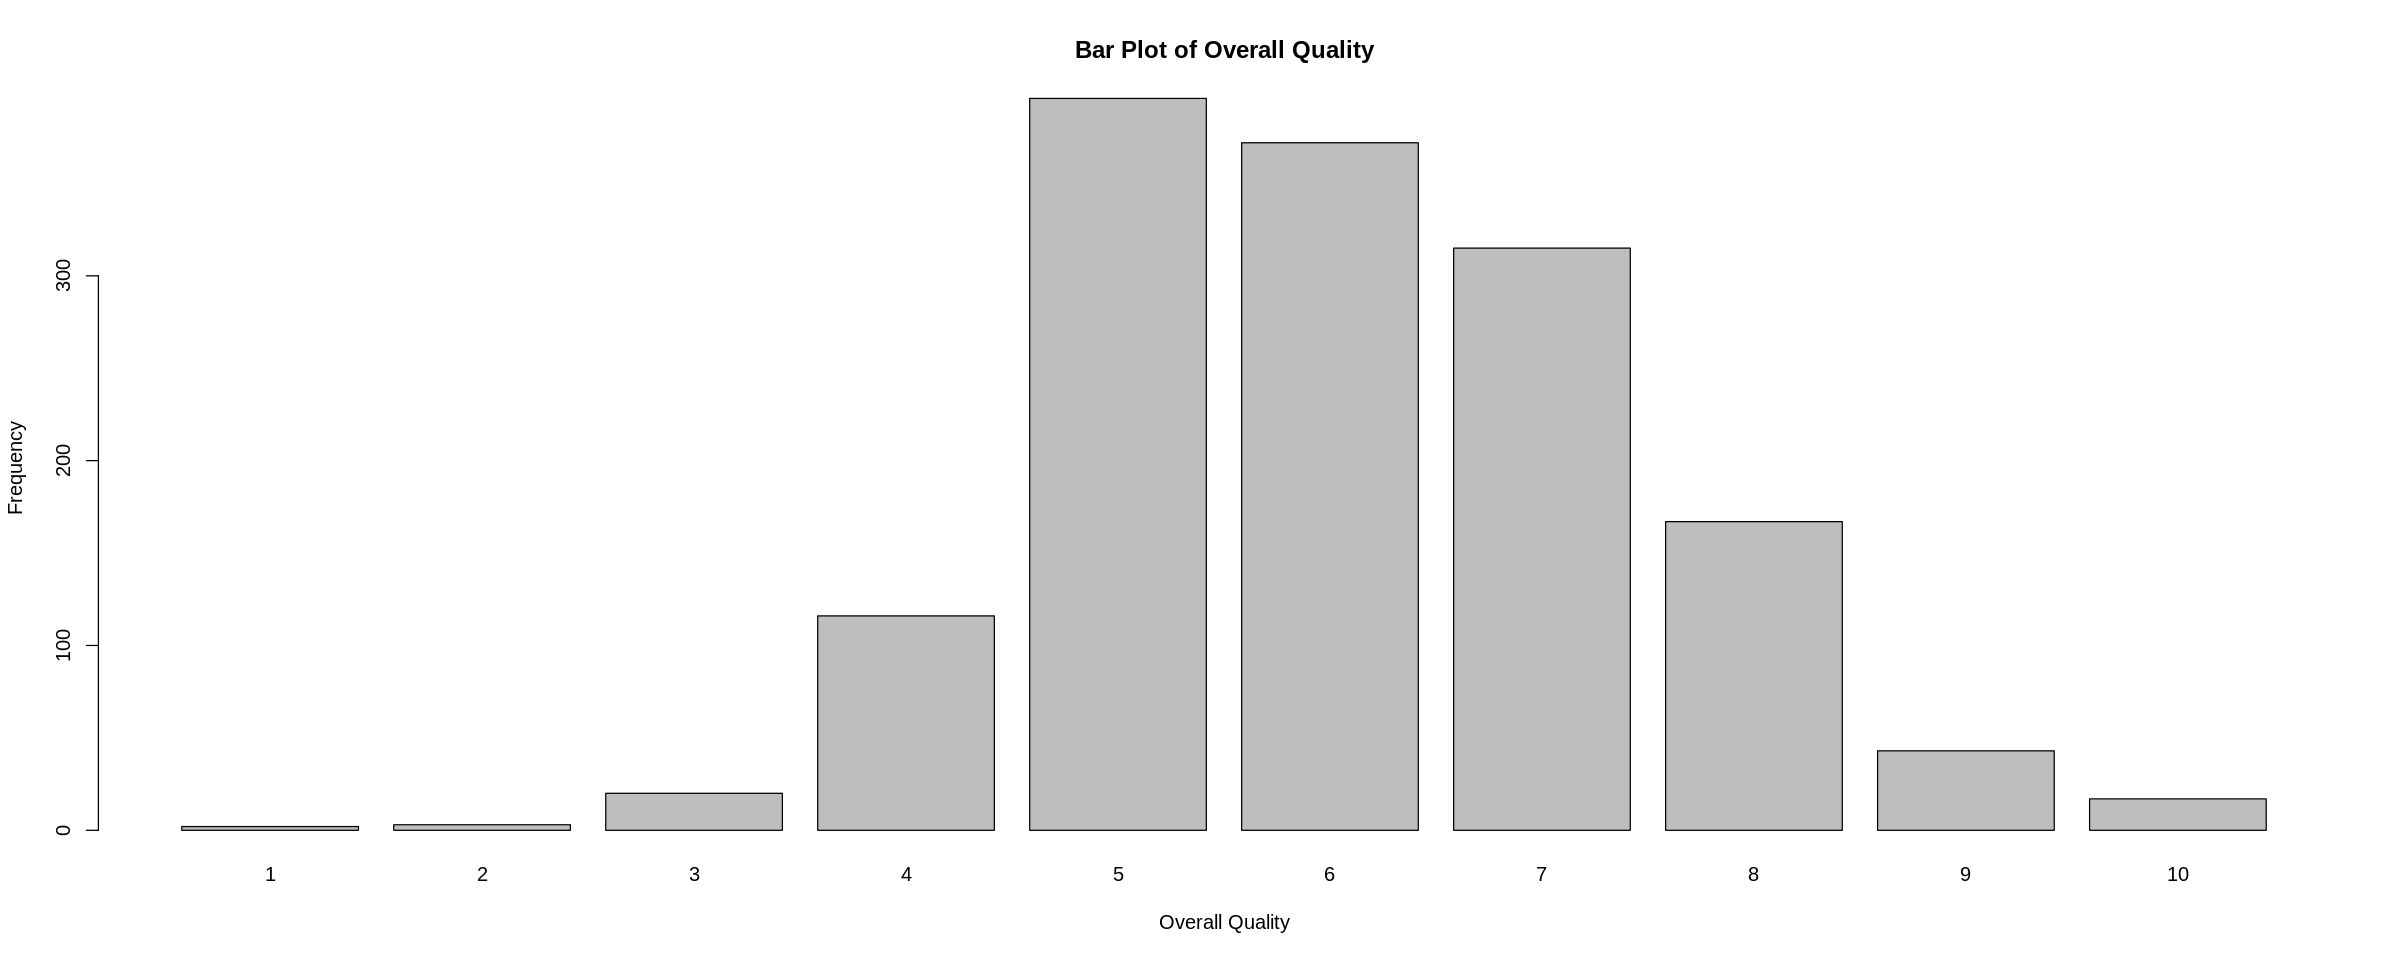

In [10]:
barplot(oq_tb$Freq, 
        main='Bar Plot of Overall Quality',
        names.arg=oq_tb$OverallQual, 
        xlab = 'Overall Quality', 
        ylab = 'Frequency')

In [11]:
t(colnames(numeric_df))

LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,⋯,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold


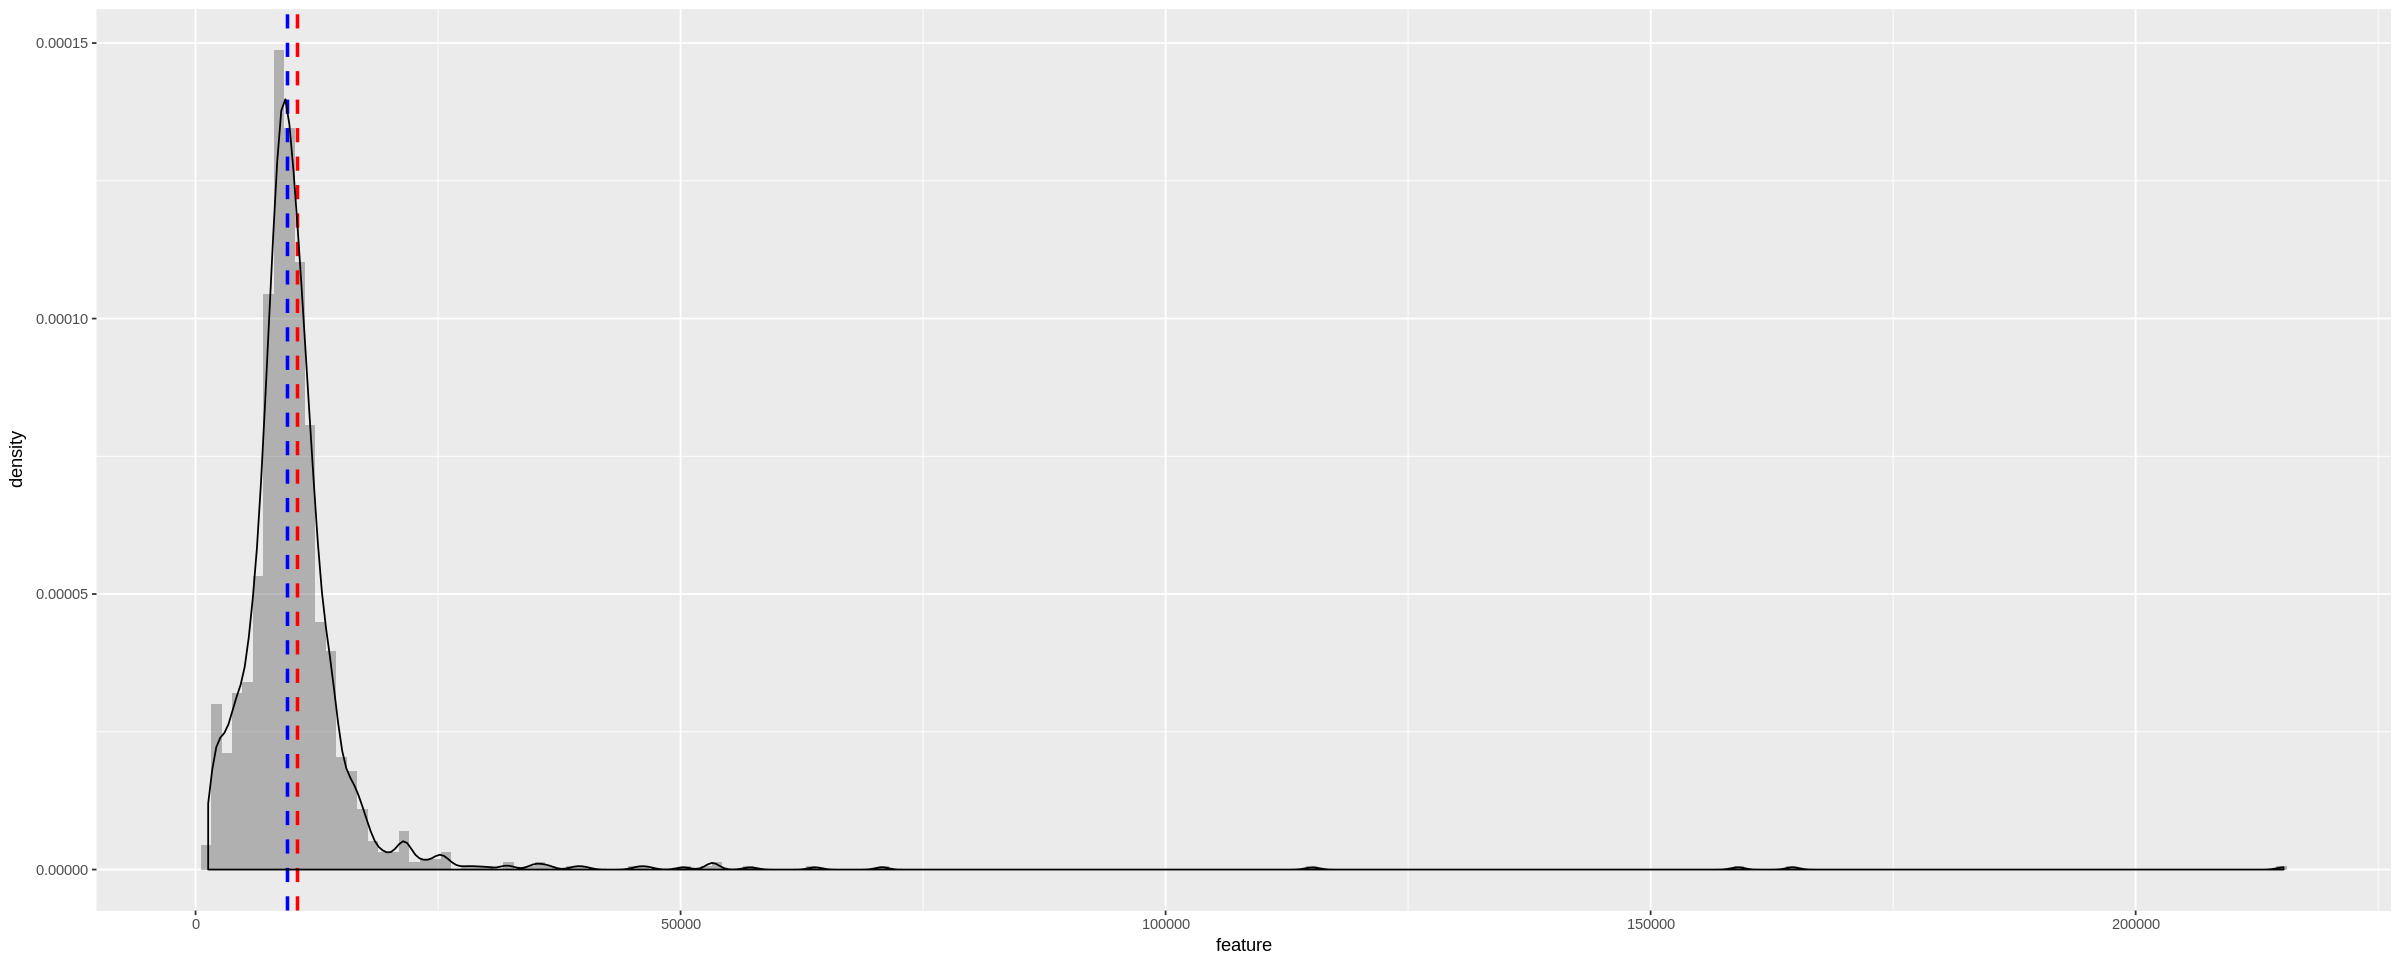

In [12]:
hist_with_kde(numeric_df$LotArea)

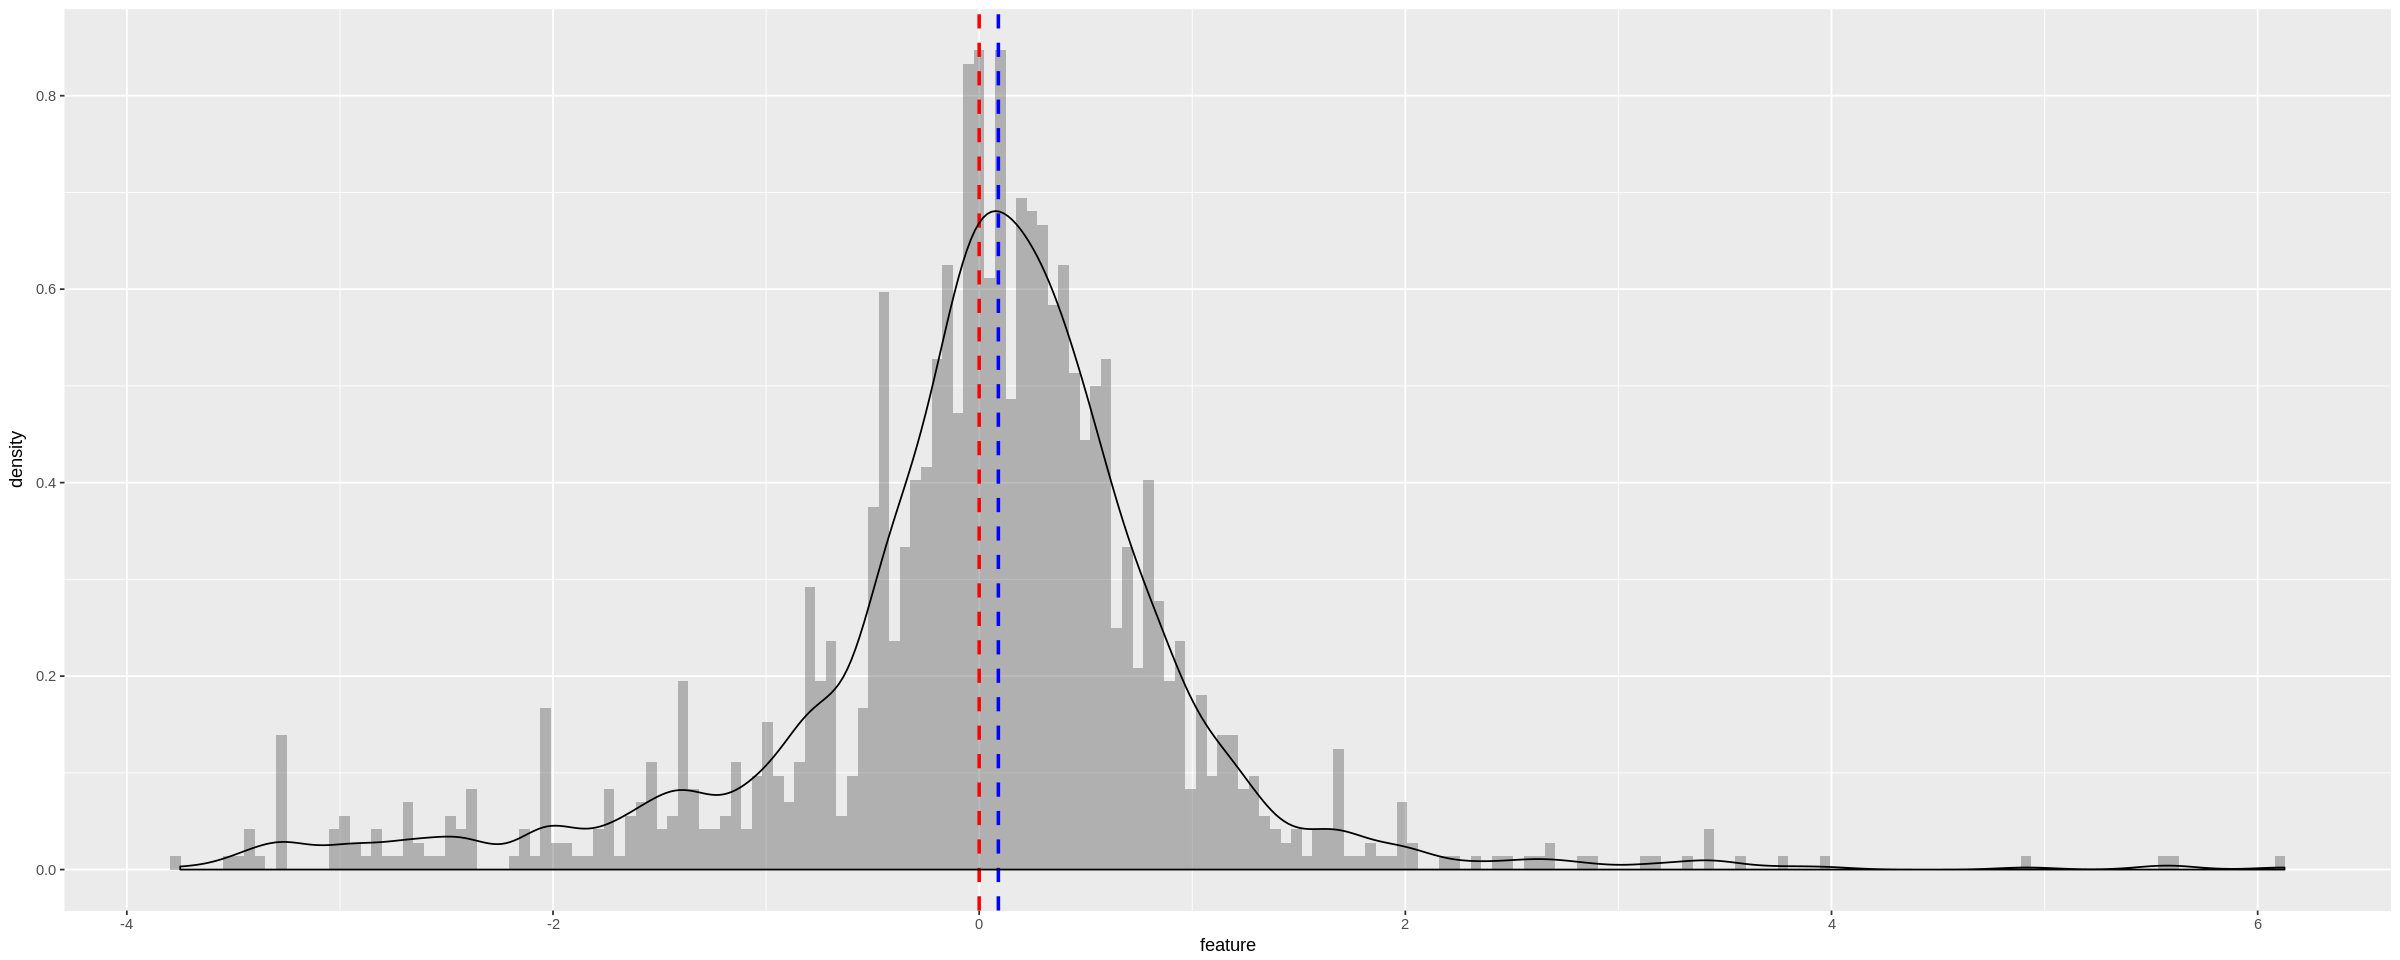

In [13]:
hist_with_kde(numeric_log_sc_df$LotArea)

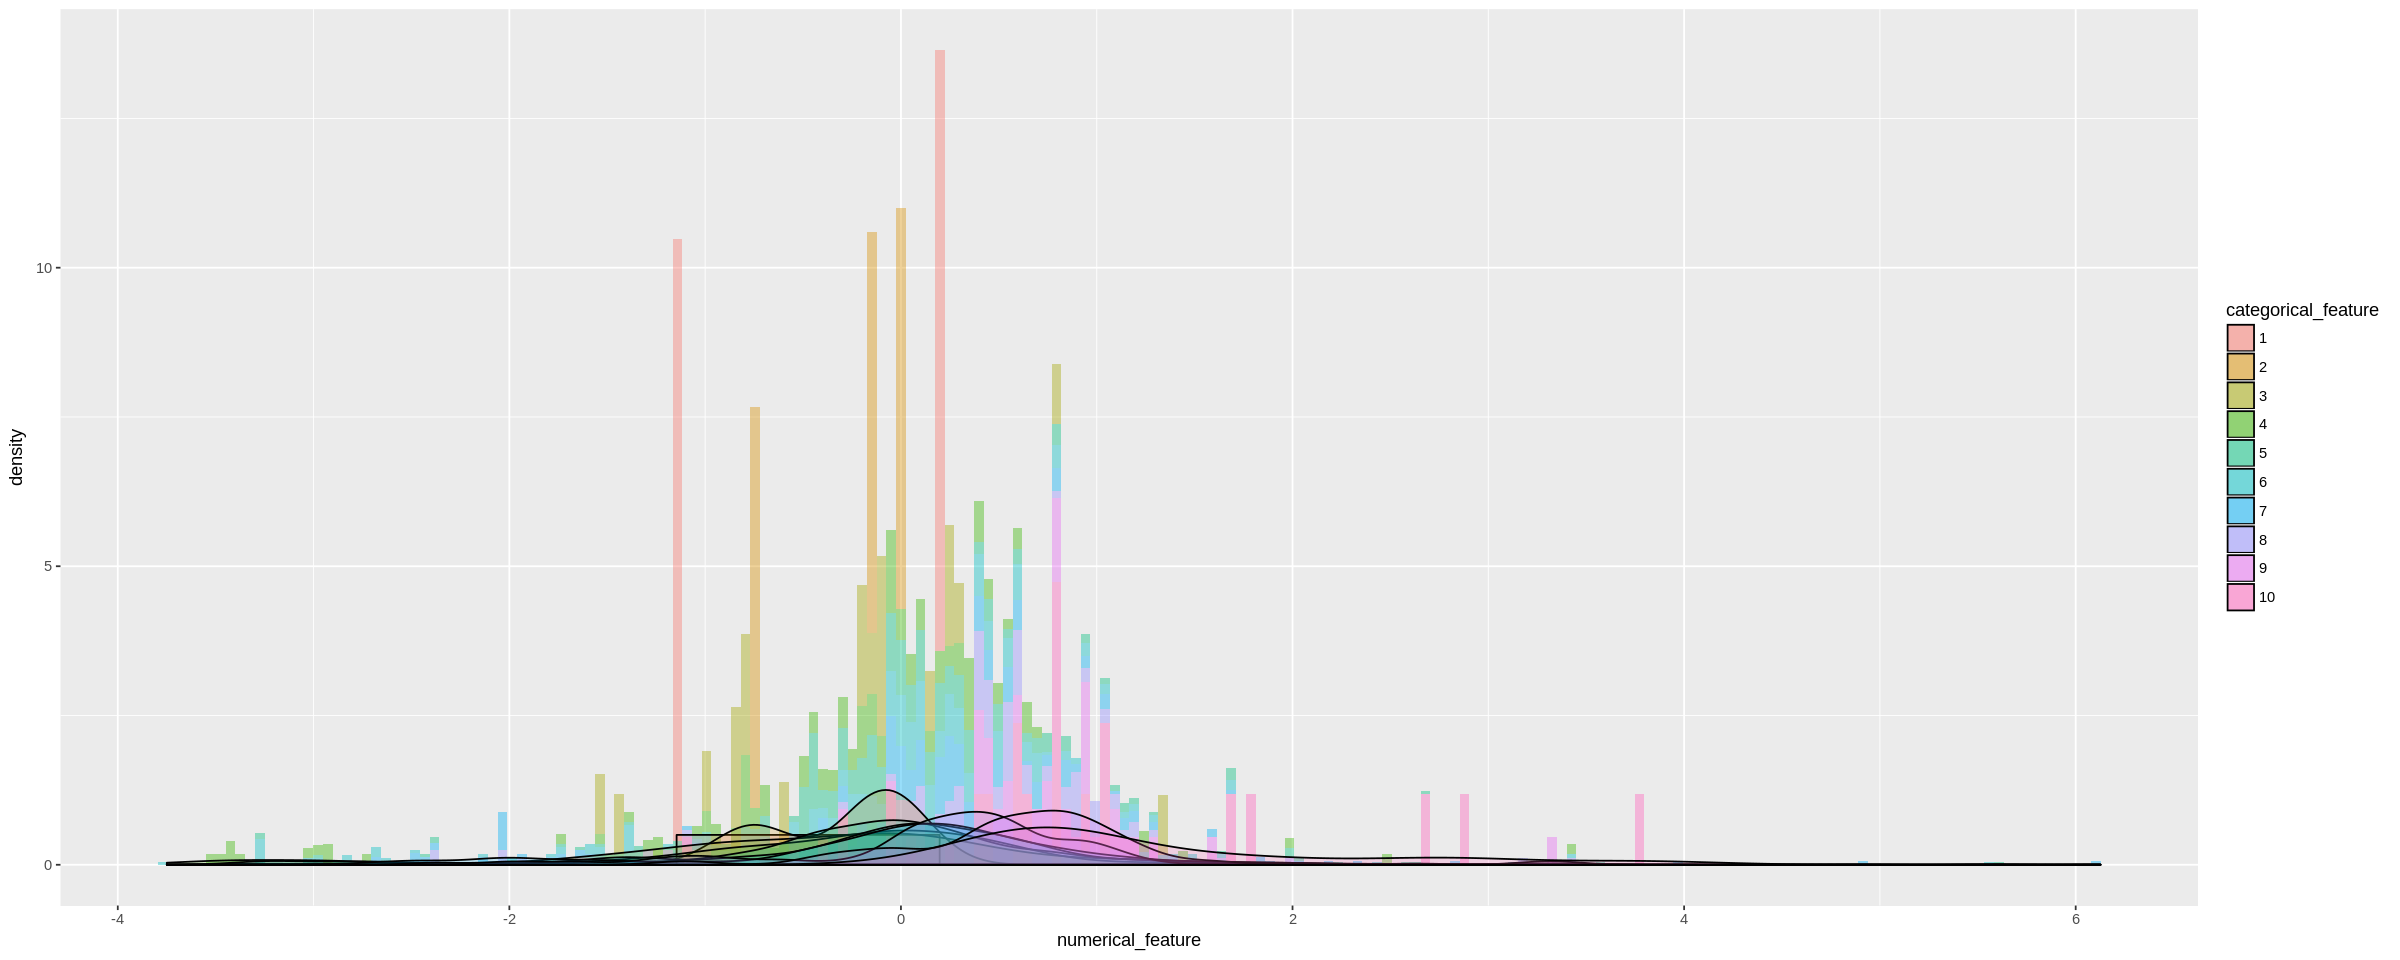

In [14]:
hist_with_kde_numerical_by_category(numeric_log_sc_df$LotArea, categoric_df$OverallQual)

### Pairs Plot 

In [17]:
install.packages('rpart')
library(caret)
library(rpart)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice


In [18]:
library(reshape2)

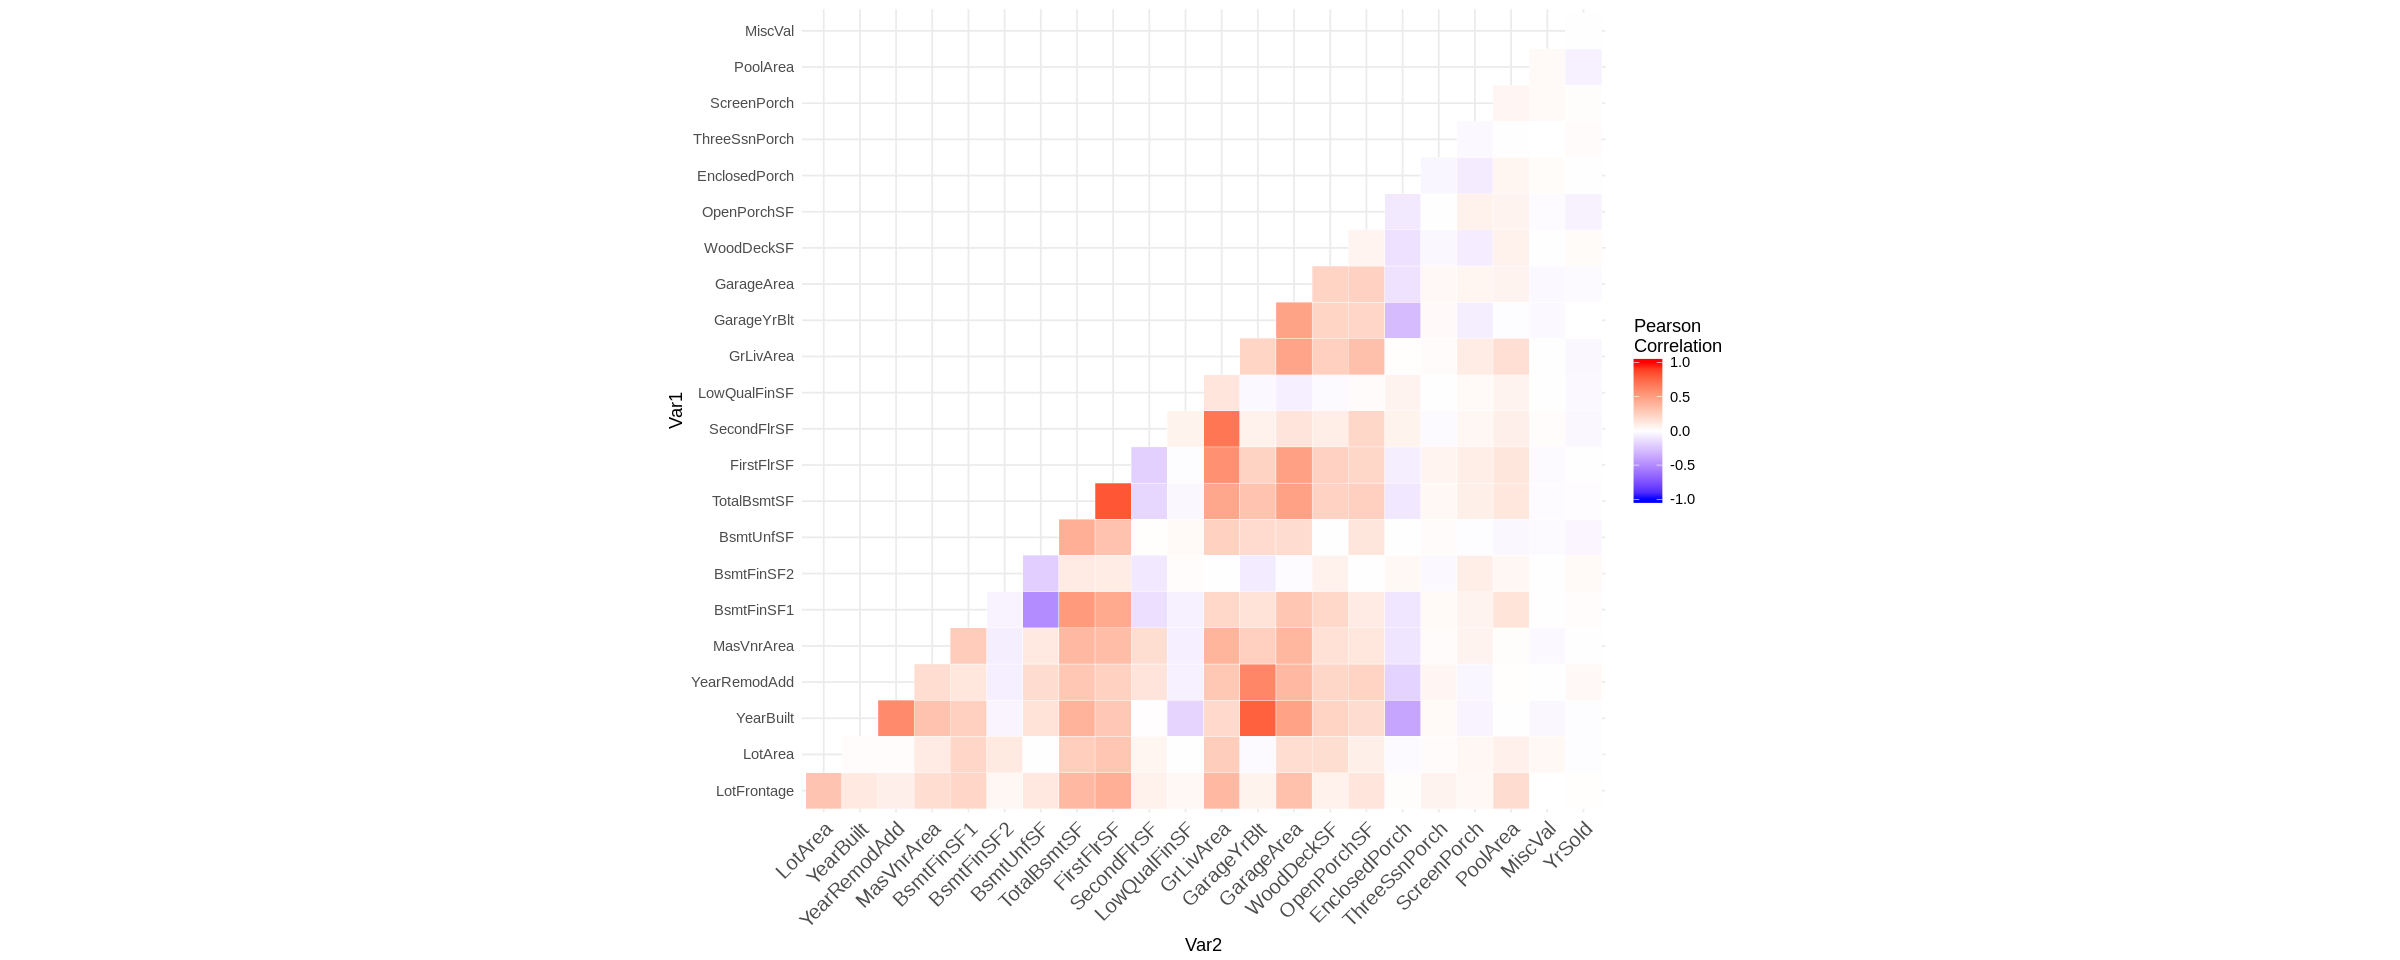

In [19]:
cormat = cor(numeric_df)

cormat[lower.tri(cormat)] <- NA
diag(cormat) <- NA

melted_cormat <- melt(cormat, na.rm = T)

library(ggplot2)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

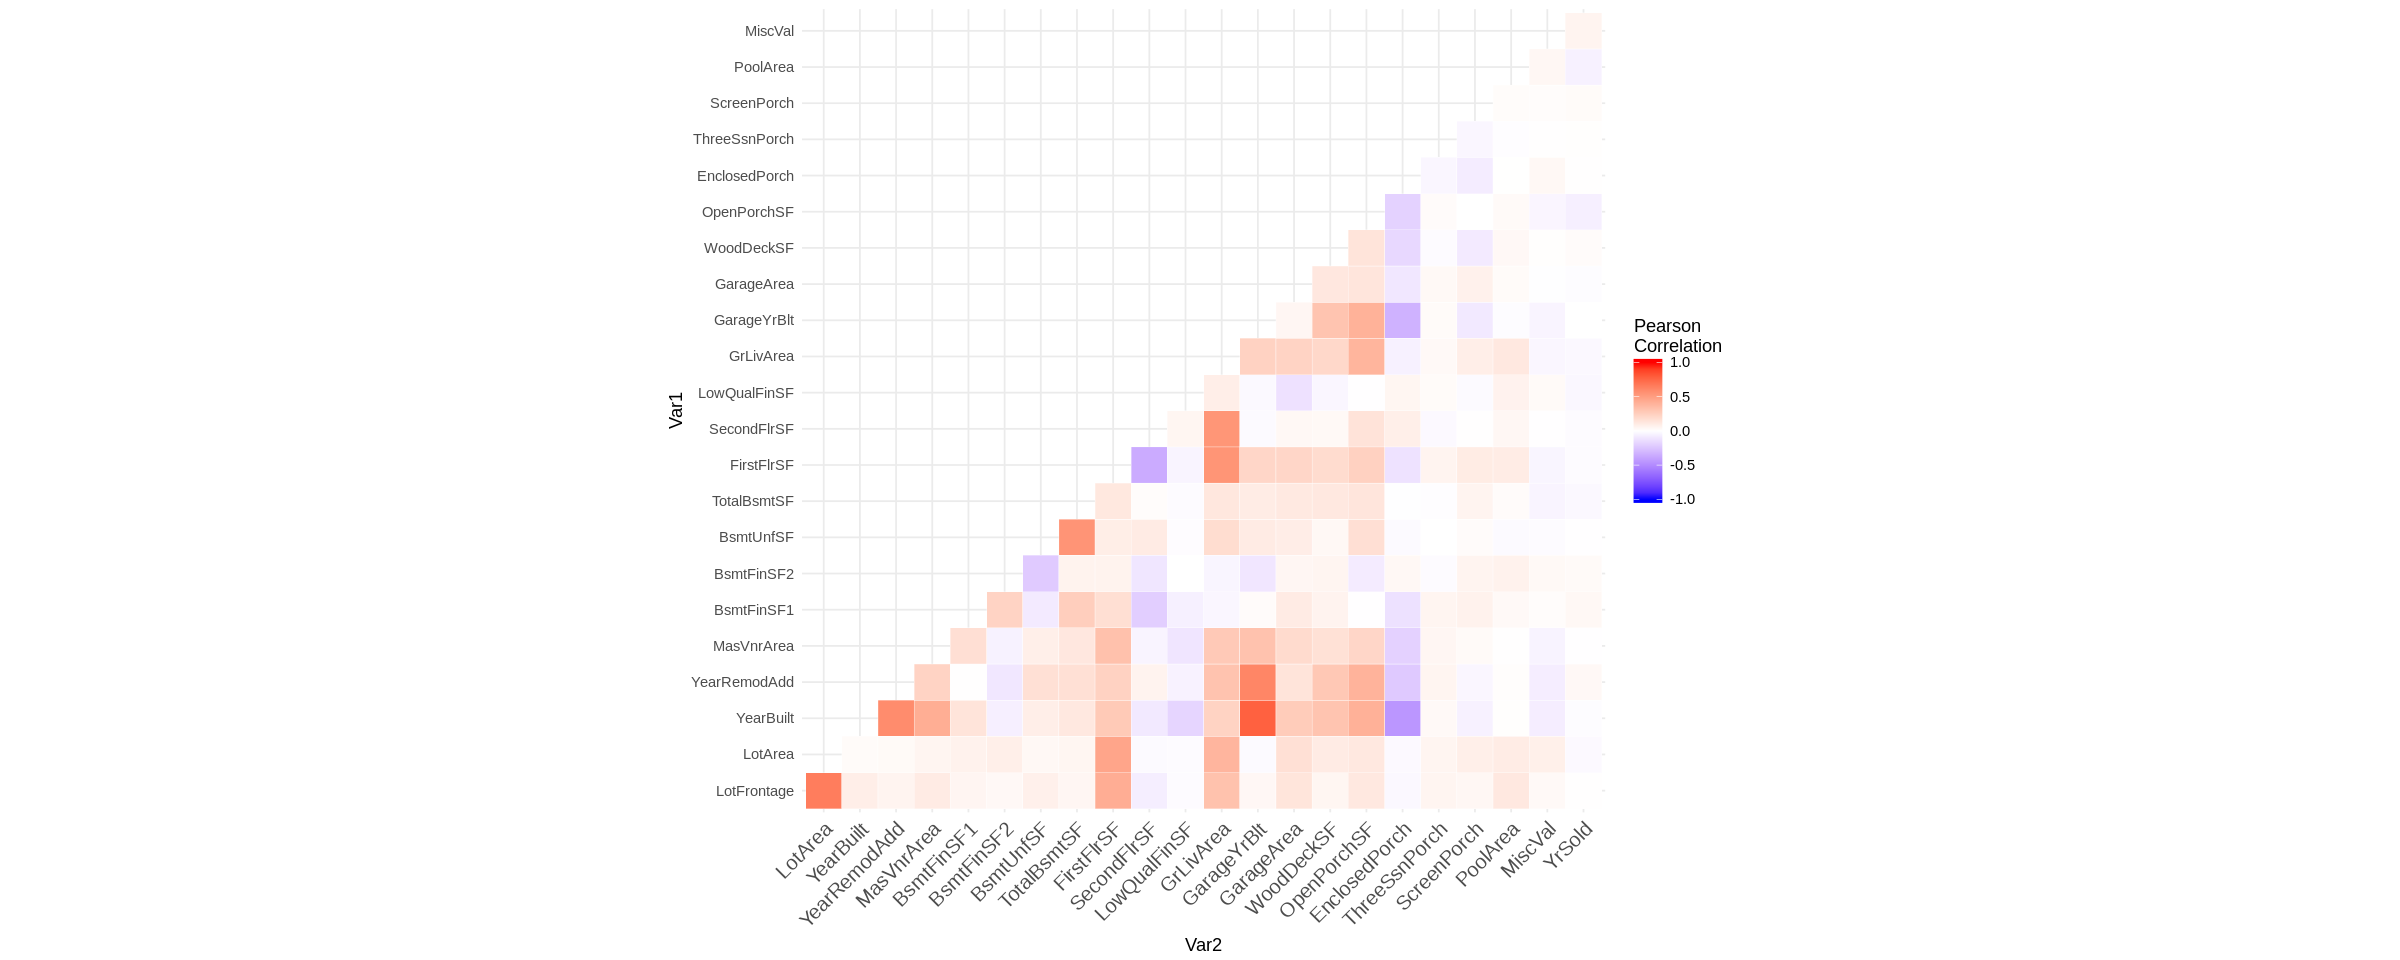

In [20]:
cormat = cor(numeric_log_sc_df)

cormat[lower.tri(cormat)] <- NA
diag(cormat) <- NA

melted_cormat <- melt(cormat, na.rm = T)

library(ggplot2)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()